In [5]:
#!/usr/bin/env python3

import csv
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [177]:
csv1_ = ['./csv_1/tag_0.csv.converted.csv',
        './csv_1/tag_1.csv.converted.csv',
        './csv_1/tag_2.csv.converted.csv',
        './csv_1/tag_3.csv.converted.csv']

csv2_ = ['./csv_2/tag_0.csv.converted.csv',
         './csv_2/tag_1.csv.converted.csv',
         './csv_2/tag_2.csv.converted.csv',
         './csv_2/tag_3.csv.converted.csv']

In [7]:
def read_pos(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    
    x = []
    y = []
    z = []
    
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
    return x, y, z


def read_pos_xy(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    x = []
    y = []
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
    return x, y

In [8]:
def tag_uav_pos(files):
    print('files:',files)
    fig = plt.figure(figsize=(18, 14), dpi=90)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('x, East')
    ax.set_ylabel('y, North')
    ax.set_zlabel('z, Up')
        
    for file, col, name in zip(files,
                               ['orange','r','b','g'],
                              ['tag_0','tag_1','tag_2','tag_3']):
        
        x, y, z = read_pos(file) 
        mean_x, mean_y, mean_z = np.mean(x), np.mean(y), np.mean(z)
        ax.plot(x, y, z, '.', color=col, label = name)
        ax.plot(mean_x, mean_y, mean_z, 'o', color='black')
        print(name, '& 平均[m] & 最大偏差[m] & 標準偏差[m]')
        for ziku, label in zip([x, y, z], ['x', 'y', 'z']):
            print(label, '&', 
                  '{:.03f}'.format(np.mean(ziku)), '&', 
                  '{:.03f}'.format(np.max(np.abs(ziku - np.mean(ziku)))) , '&', 
                  '{:.03f}'.format(np.std(ziku)))
        print('---------------')
    ax.legend()
    plt.show()

In [27]:
# initioal_postionに対する　Tagの位置
# tag_uav_pos(csv1_)
# tag_uav_pos(csv2_)

In [28]:
def tag_pos_xy(files):
    
    fig = plt.figure(figsize=(20, 9), dpi=90)
    ax = fig.add_subplot(111)
    ax.set_xlabel('x, East [m]')
    ax.set_ylabel('y, North [m]')
        
    for file, col, name in zip(files,
                               ['orange','r','b','g'],
                              ['tag_0','tag_1','tag_2','tag_3']):
        
        x, y = read_pos_xy(file) 
        mean_x = np.mean(x)
        mean_y = np.mean(y)
        ax.plot(x, y, '.', color=col, label = name)
        ax.plot(mean_x, mean_y, 'o', color='black')
        draw_circle = plt.Circle((mean_x, mean_y), 1, fill=col, alpha=0.3)
        ax.add_artist(draw_circle)
    ax.set_xlim(-5,15)
    ax.set_ylim(4,13)
    ax.legend()
    plt.show()

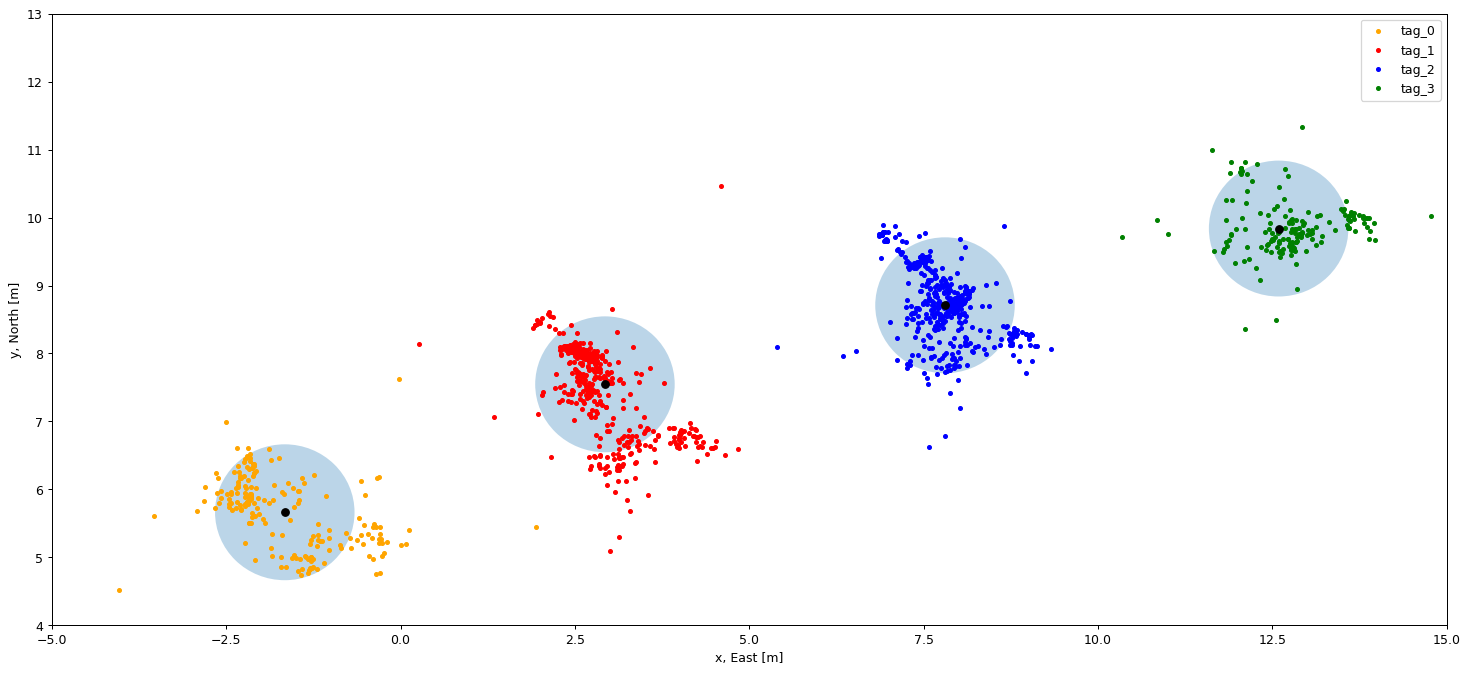

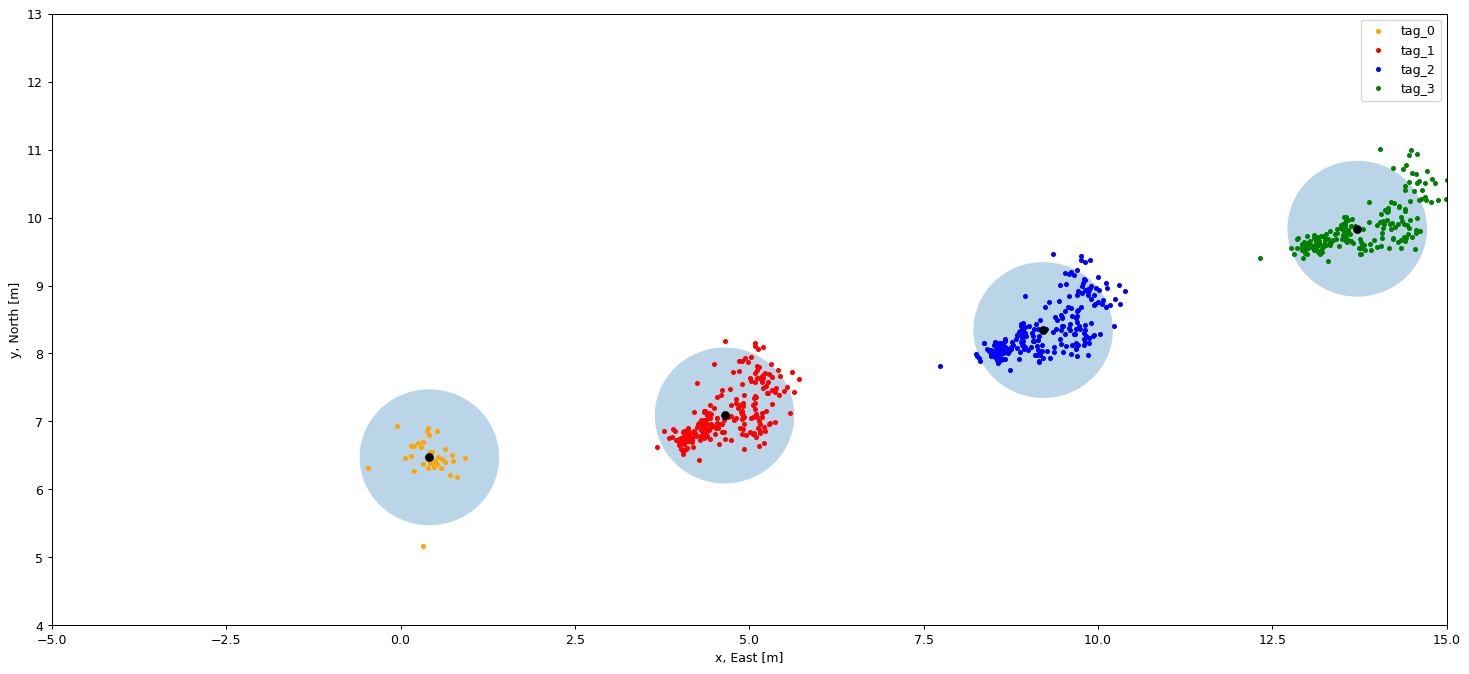

In [24]:
tag_pos_xy(csv1_)
tag_pos_xy(csv2_)

In [25]:
def read_pos_xyd(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    x = []
    y = []
    d = []
    for row in data[1:]:
        if row[1] == '':
            continue
        x.append(float(row[1]))
        y.append(float(row[2]))
        d.append(np.sqrt(float(row[1])**2 + float(row[1])**2))
    return x, y

def in_circle(files, dx, dy):        
    for file, col, name in zip(files,['orange','r','b','g'],['tag_0','tag_1','tag_2','tag_3']):
        x, y = read_pos_xy(file) 
        mean_x = np.mean(x)
        mean_y = np.mean(y)
    ax.set_xlim(-5,15)
    ax.set_ylim(4,13)
    ax.legend()
    plt.show()

In [33]:
# tag_pos_xy(csv2_)

In [34]:
# tag_uav_pos(csv1)

In [35]:
# tag_uav_pos(csv2)

In [36]:
def read_pos_all(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]
    t = []
    x = []
    y = []
    z = []
    
    for row in data[1:]:
        if row[1] == '':
            continue
        t.append(float(row[0]))
        x.append(float(row[1]))
        y.append(float(row[2]))
        z.append(float(row[3]))
    return t, x, y, z

In [37]:
# read_pos_all(csv2[0])

Ex1: UAV_pose.csv \
上り(5: , 6: , 7: 941, 8: 982, 9: 993, 10:1012)\
下り(9: 1265, 8: 1287, 7: 1400)

Ex2: UAV_pose.csv \
上り(5: , 6: , 7: , 8: , 9: , 10:)\
下り(9: , 8: , 7: )

In [38]:
def in_circle_percent(x, y, r):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    cnt = 0
    for i in range(len(x)):
        d = np.sqrt((x[i]-mean_x)**2 + (y[i]-mean_y)**2)
        if d <= r:
            cnt += 1
    print('{:.02f}'.format(cnt/len(x)*100),'%')

In [31]:
for file in file1_paths_convert:
    x, y = read_pos_xy(file)
    in_circle_percent(x, y, 1)

NameError: name 'file1_paths_convert' is not defined

In [32]:
for file in file2_paths_convert:
    x, y = read_pos_xy(file)
    in_circle_percent(x, y, 1)

NameError: name 'file2_paths_convert' is not defined

In [226]:
# EX1を絞る
def filter_pos_ex1(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]

    # h: 3以上,6未満
    x1 = []
    y1 = []

    for row in data[532:940]:
        if row[1] == '':
            continue
        x1.append(float(row[1]))
        y1.append(float(row[2]))

    for row in data[1317:1408]:
        if row[1] == '':
            continue
        x1.append(float(row[1]))
        y1.append(float(row[2]))

    #############
    # h = 7以上,9未満
    x2 = []
    y2 = []

    for row in data[941:1011]:
        if row[1] == '':
            continue
        x2.append(float(row[1]))
        y2.append(float(row[2]))

    for row in data[1265:1316]:
        if row[1] == '':
            continue
        x2.append(float(row[1]))
        y2.append(float(row[2]))

    ###########
    # h = 10以上
    x3 = []
    y3 = []

    for row in data[1012:1264]:
        if row[1] == '':
            continue
        x3.append(float(row[1]))
        y3.append(float(row[2]))
        
    return x1, y1, x2, y2, x3, y3

In [253]:
def filter_plot_ex1():
    
    fig = plt.figure(figsize=(12, 6), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_xlabel('x, East [m]')
    ax.set_ylabel('y, North [m]')
    for file,col in zip(csv1_,
                    ['r','b','g','orange']):
        x1, y1, x2, y2, x3, y3 = filter_pos_ex1(file)
        for name, mark, x, y in zip(['3-6','7-9','10-'],
                                    ['x','v','+'],
                                    [x1, x2, x3], 
                                    [y1, y2, y3]):
            mean_x = np.mean(x)
            mean_y = np.mean(y)
            ax.plot(x, y, mark, color=col)
            # ax.plot(mean_x, mean_y, 'o', color='black')
            # draw_circle = plt.Circle((mean_x, mean_y), 0.5, color=col, alpha=0.2)
            # ax.add_artist(draw_circle)
    ax.set_xlim(-3,15)
    ax.set_ylim(4,13)
    # ax.legend()
    plt.show()

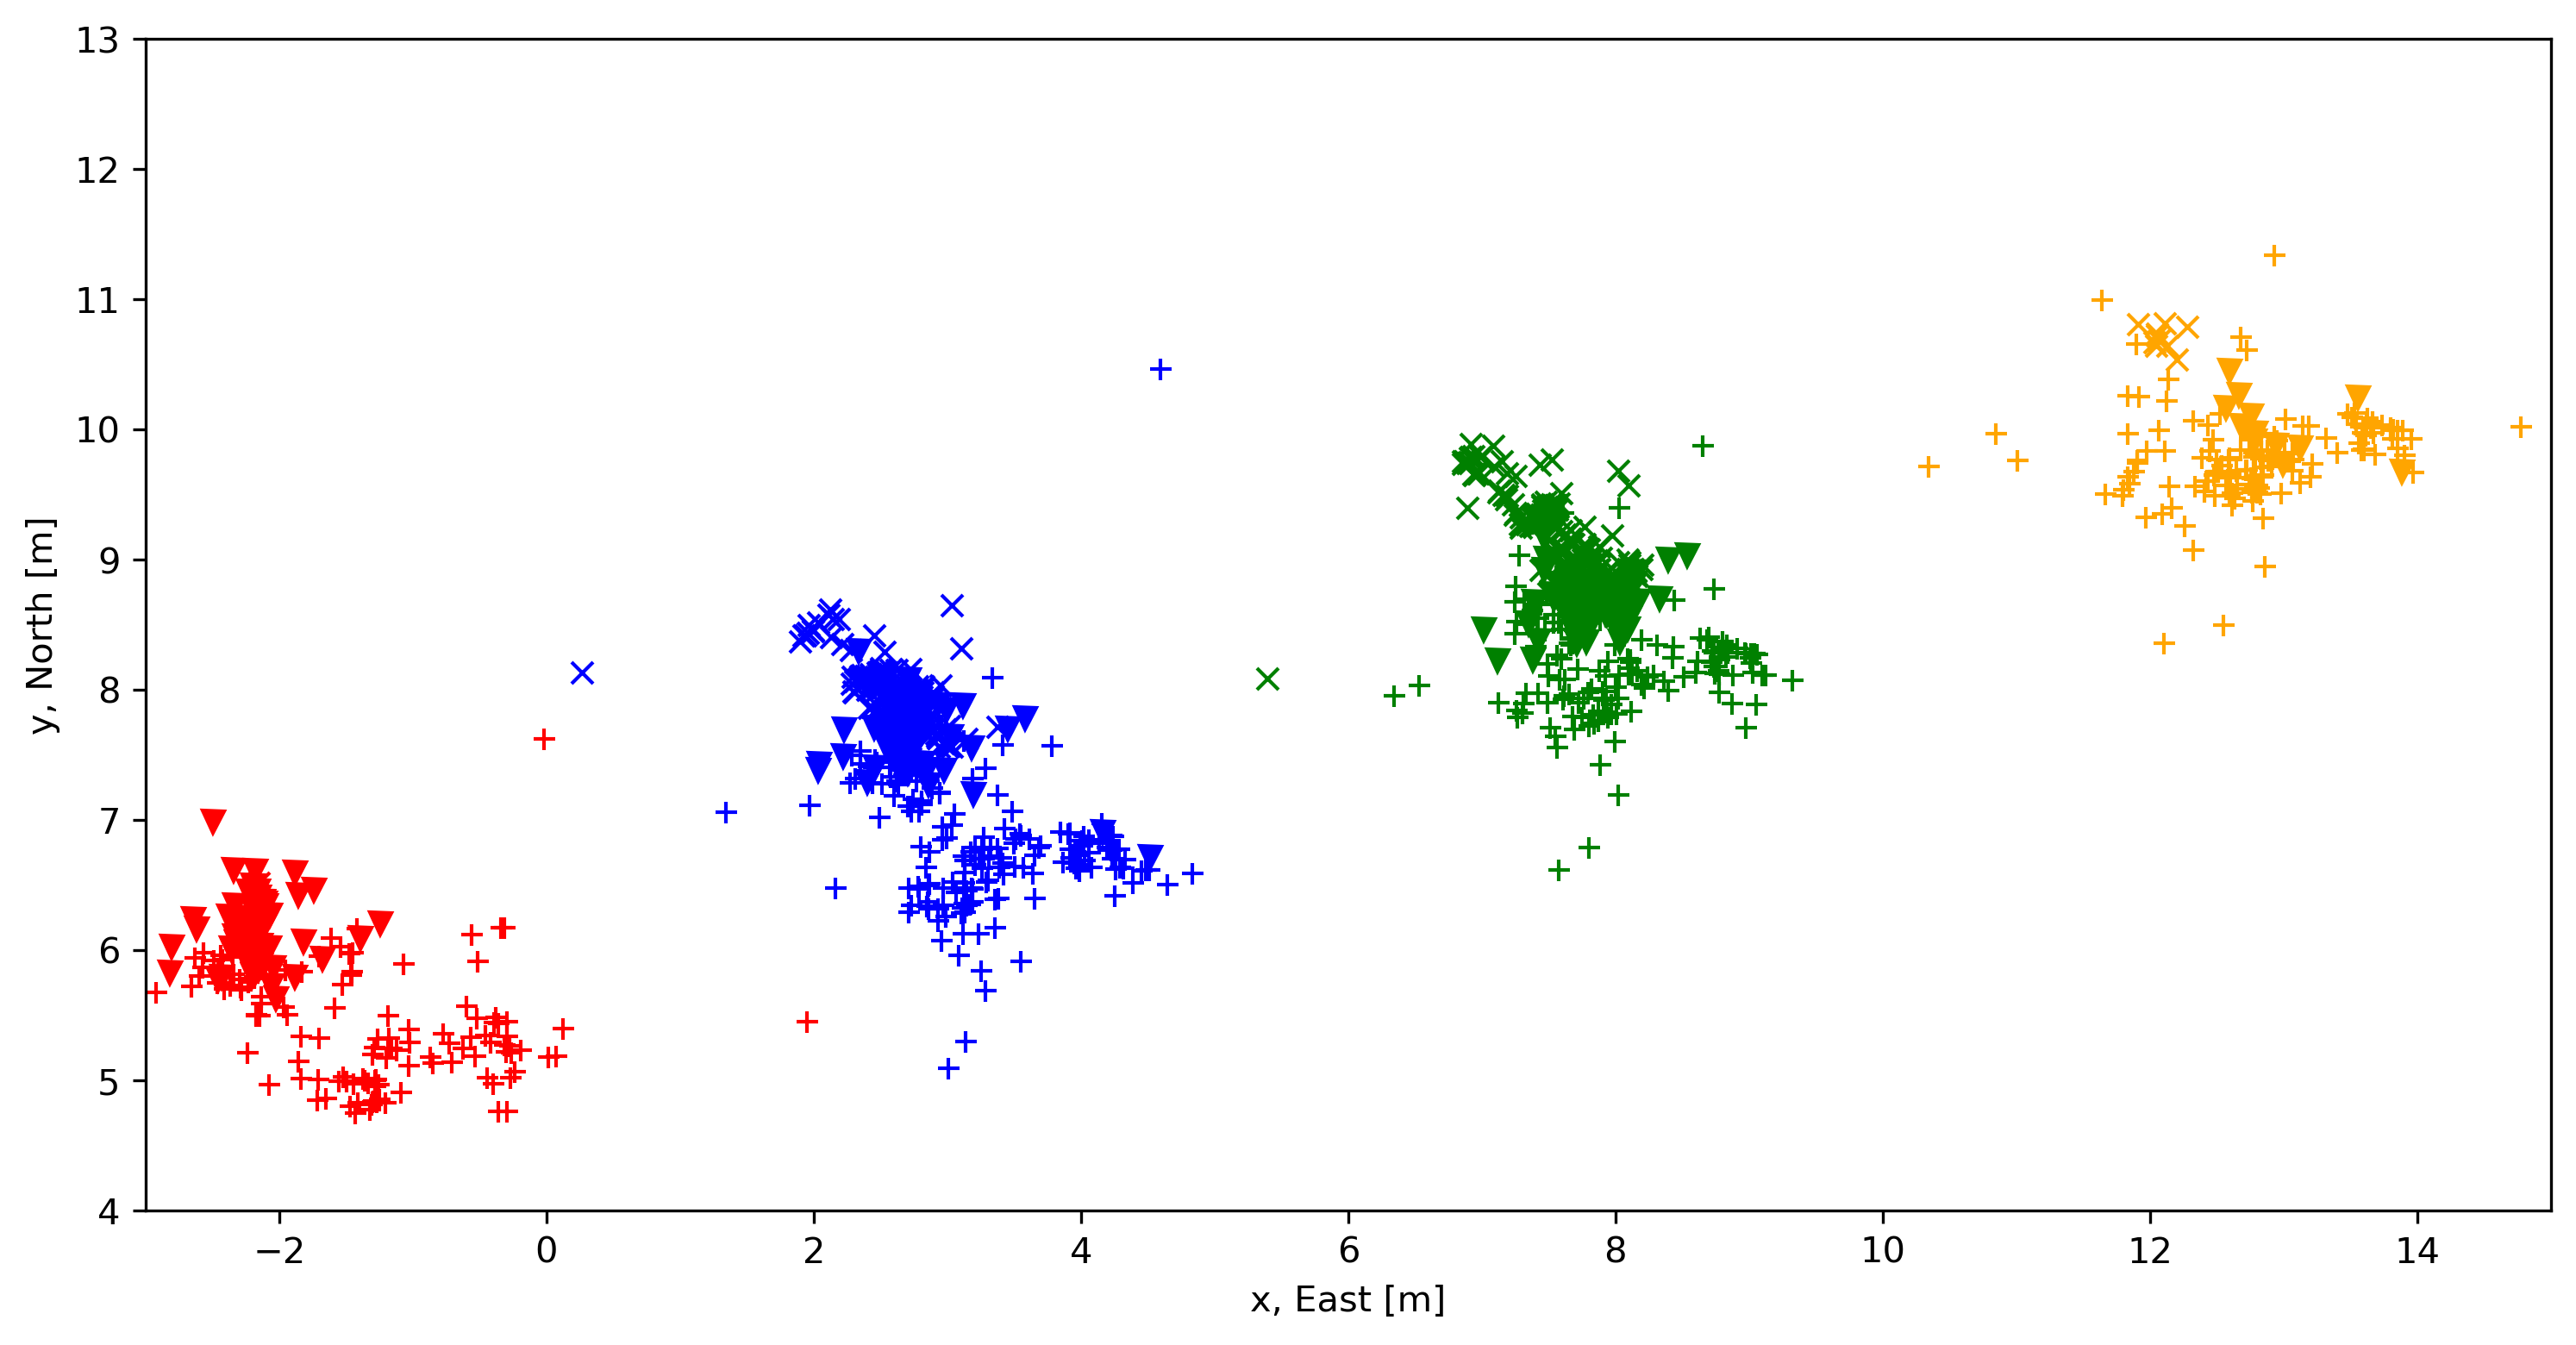

In [254]:
filter_plot_ex1()

In [259]:
# EX2を絞る
def filter_pos_ex2(file):
    reader = csv.reader(open(file))
    data = [row for row in reader]

    # h: 3以上,6未満
    x1 = []
    y1 = []

    for row in data[186:315]:
        if row[1] == '':
            continue
        x1.append(float(row[1]))
        y1.append(float(row[2]))

    for row in data[525:569]:
        if row[1] == '':
            continue
        x1.append(float(row[1]))
        y1.append(float(row[2]))

    #############
    # h: 7以上,9未満
    x2 = []
    y2 = []

    for row in data[316:366]:
        if row[1] == '':
            continue
        x2.append(float(row[1]))
        y2.append(float(row[2]))

    for row in data[519:524]:
        if row[1] == '':
            continue
        x2.append(float(row[1]))
        y2.append(float(row[2]))

    #############
    # h = 10以上,15未満
    x3 = []
    y3 = []

    for row in data[367:437]:
        if row[1] == '':
            continue
        x3.append(float(row[1]))
        y3.append(float(row[2]))

    for row in data[509:518]:
        if row[1] == '':
            continue
        x3.append(float(row[1]))
        y3.append(float(row[2]))

    ###########
    # h = 16以上
    x4 = []
    y4 = []

    for row in data[438:508]:
        if row[1] == '':
            continue
        x4.append(float(row[1]))
        y4.append(float(row[2]))
        
    return x1, y1, x2, y2, x3, y3, x4, y4

In [260]:
def filter_plot_ex2():
    
    fig = plt.figure(figsize=(10, 5), dpi=300)
    ax = fig.add_subplot(111)
    ax.set_xlabel('x, East [m]')
    ax.set_ylabel('y, North [m]')
    for file in csv2_:
        x1, y1, x2, y2, x3, y3, x4, y4 = filter_pos_ex2(file)
        for col, name, x, y in zip(['r','b','g', 'orange'],
                                         ['3-6','7-9','10-15', '16-'],
                                         [x1, x2, x3, x4], 
                                         [y1, y2, y3, y4]):
            mean_x = np.mean(x)
            mean_y = np.mean(y)
            ax.plot(x, y, '.', color=col)
            # ax.plot(mean_x, mean_y, 'o', color='black')
            # draw_circle = plt.Circle((mean_x, mean_y), 0.5, color=col, alpha=0.2)
            # ax.add_artist(draw_circle)
    ax.set_xlim(-0.5,15.5)
    ax.set_ylim(4,12)
    # ax.legend()
    plt.show()

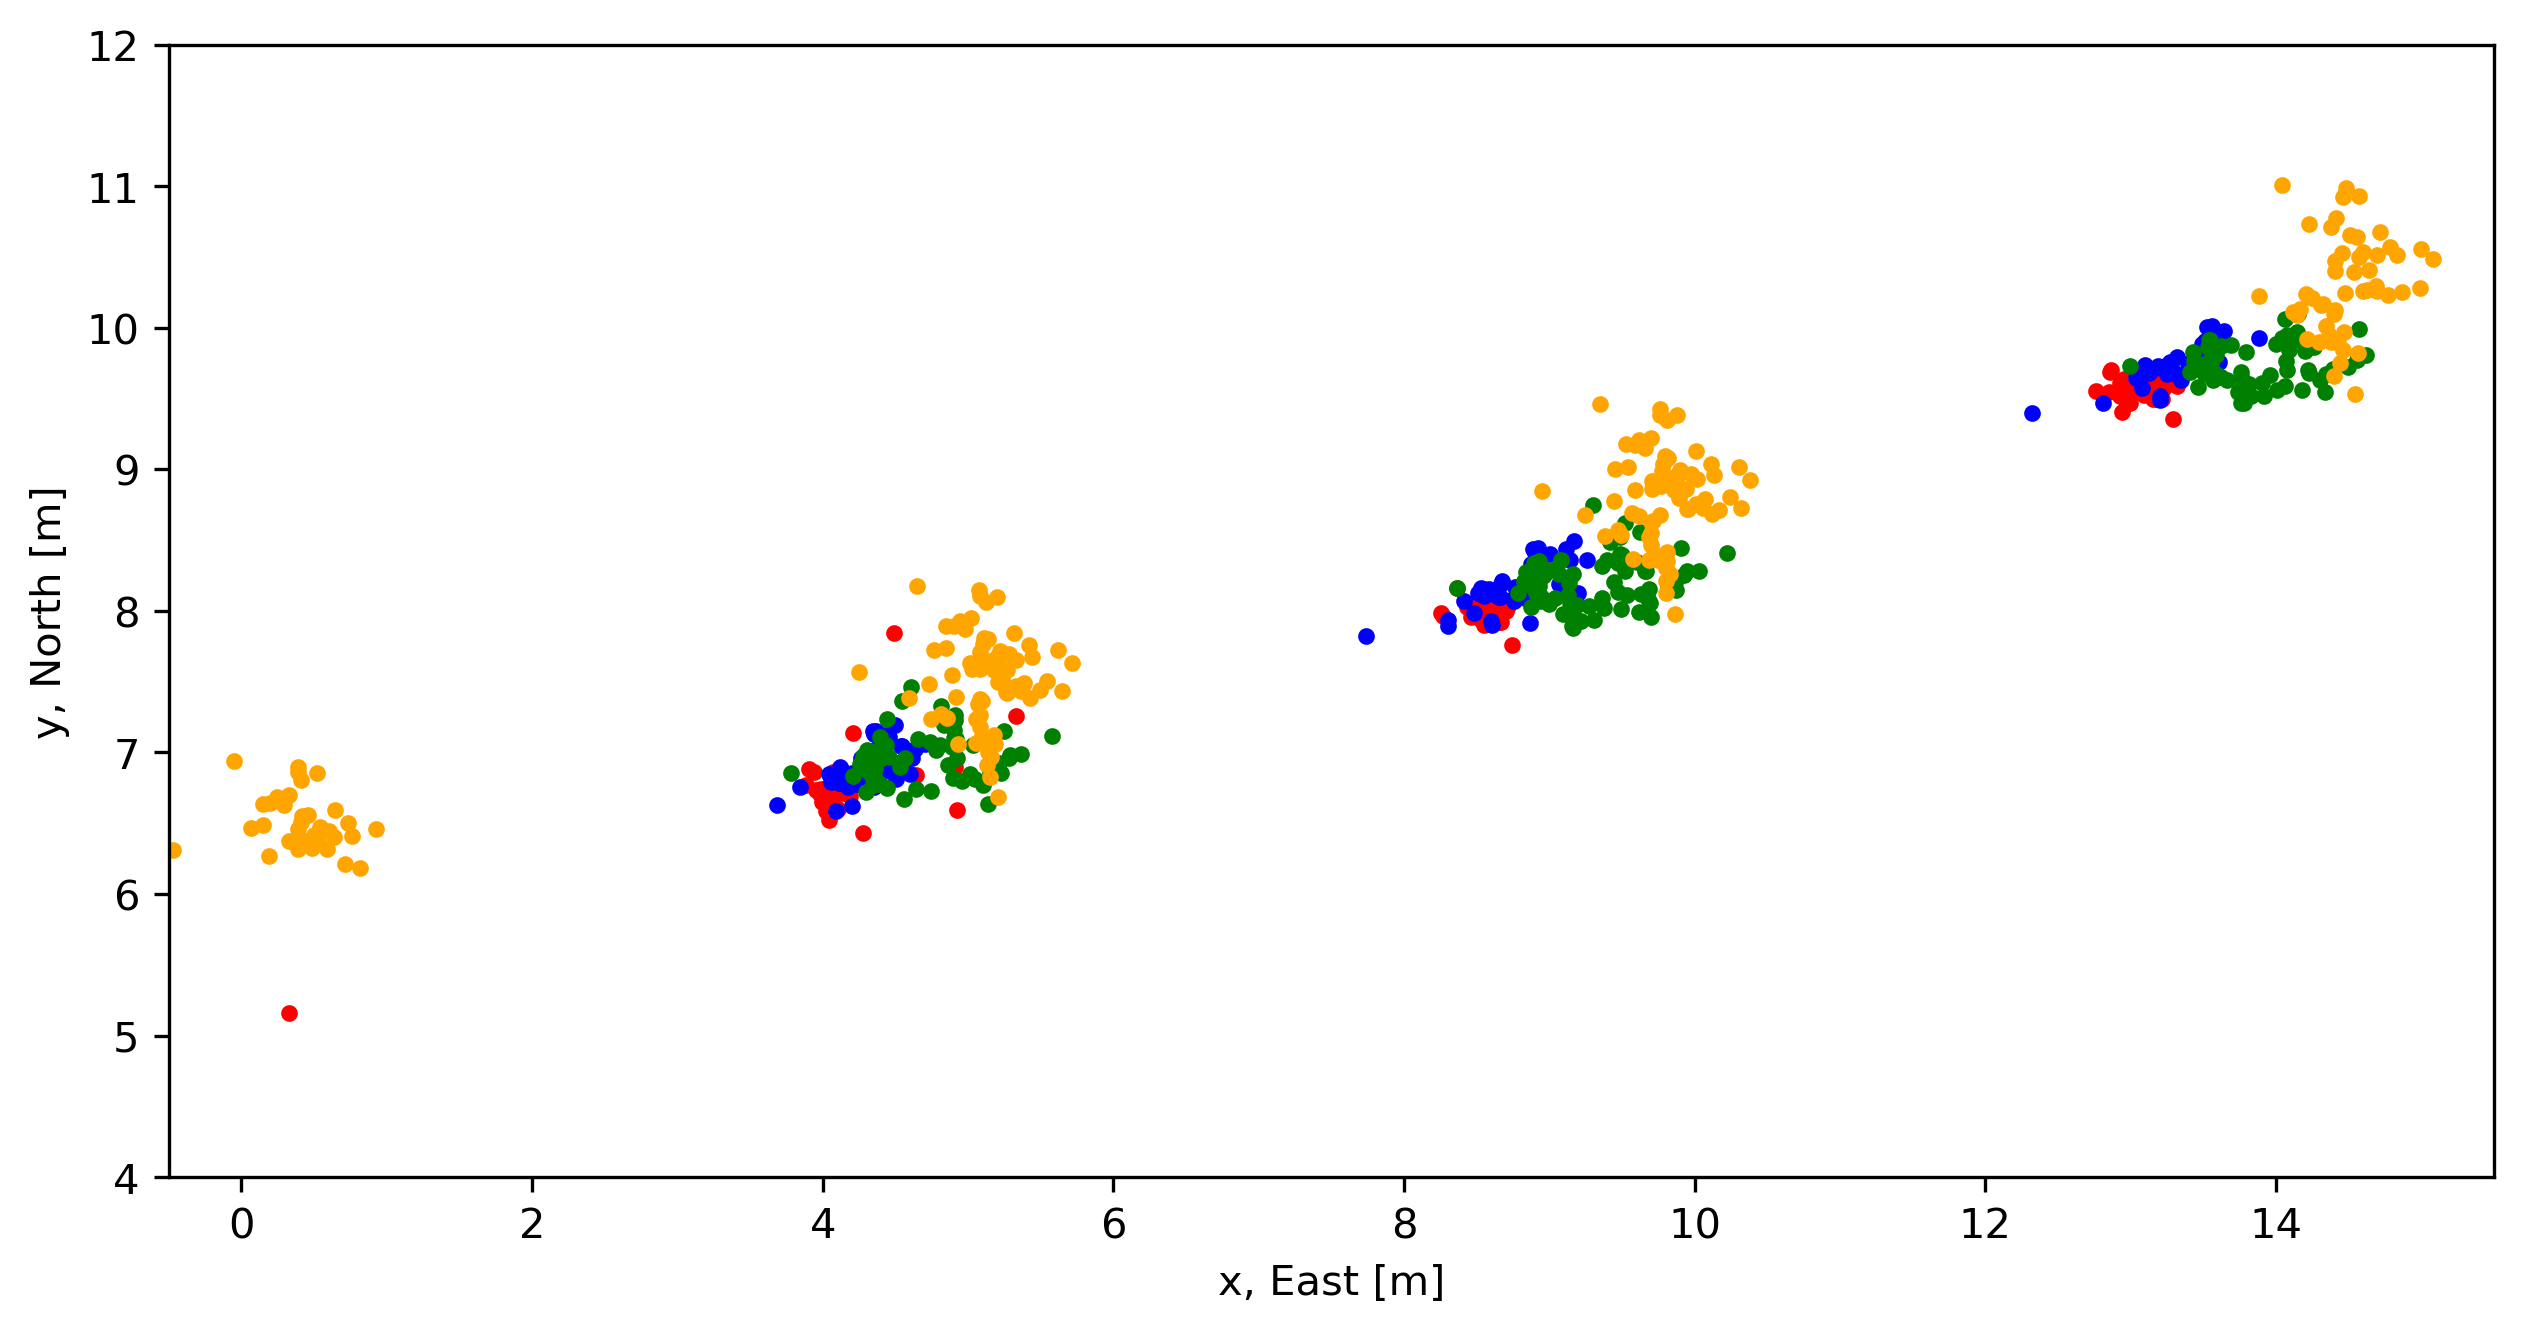

In [261]:
filter_plot_ex2()